In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os 

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_2016_eda.log"),  
        logging.StreamHandler()
    ]
)

logging.info("Inicio del notebook de EDA (001_2016_eda.ipynb).")

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

2025-05-21 23:23:27,088 - INFO - Inicio del notebook de EDA (001_2016_eda.ipynb).


In [2]:
# --- Definición de la ruta al archivo ---
file_path = "/home/nicolas/Escritorio/workshops_ETL/workshop_3/data/raw/2016.csv"

logging.info(f"Ruta del archivo a cargar: {file_path}")

df_2016 = None

try:
    logging.info(f"Intentando cargar el archivo CSV: {os.path.basename(file_path)}")
    df_2016 = pd.read_csv(file_path)
    logging.info(f"Archivo {os.path.basename(file_path)} cargado exitosamente.")
    logging.info(f"El DataFrame tiene {df_2016.shape[0]} filas y {df_2016.shape[1]} columnas.")

except FileNotFoundError:
    logging.error(f"Error: El archivo no fue encontrado en la ruta especificada: {file_path}")
except pd.errors.EmptyDataError:
    logging.error(f"Error: El archivo {os.path.basename(file_path)} está vacío.")
except pd.errors.ParserError:
    logging.error(f"Error: No se pudo parsear el archivo {os.path.basename(file_path)}. Verifica el formato del CSV.")
except Exception as e:
    logging.error(f"Ocurrió un error inesperado al cargar {os.path.basename(file_path)}: {e}")

2025-05-21 23:23:27,095 - INFO - Ruta del archivo a cargar: /home/nicolas/Escritorio/workshops_ETL/workshop_3/data/raw/2016.csv
2025-05-21 23:23:27,096 - INFO - Intentando cargar el archivo CSV: 2016.csv
2025-05-21 23:23:27,099 - INFO - Archivo 2016.csv cargado exitosamente.
2025-05-21 23:23:27,100 - INFO - El DataFrame tiene 157 filas y 13 columnas.


In [3]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Mostrando las primeras 5 filas del DataFrame en formato Markdown.")
    print("\nPrimeras 5 filas del DataFrame (Markdown):")
    print(df_2016.head().to_markdown(index=False))
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:27,112 - INFO - Mostrando las primeras 5 filas del DataFrame en formato Markdown.



Primeras 5 filas del DataFrame (Markdown):
| Country     | Region         |   Happiness Rank |   Happiness Score |   Lower Confidence Interval |   Upper Confidence Interval |   Economy (GDP per Capita) |   Family |   Health (Life Expectancy) |   Freedom |   Trust (Government Corruption) |   Generosity |   Dystopia Residual |
|:------------|:---------------|-----------------:|------------------:|----------------------------:|----------------------------:|---------------------------:|---------:|---------------------------:|----------:|--------------------------------:|-------------:|--------------------:|
| Denmark     | Western Europe |                1 |             7.526 |                       7.46  |                       7.592 |                    1.44178 |  1.16374 |                    0.79504 |   0.57941 |                         0.44453 |      0.36171 |             2.73939 |
| Switzerland | Western Europe |                2 |             7.509 |                       7.428 |   

In [4]:
# --- Obtener y mostrar la lista de columnas ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Obteniendo la lista de todas las columnas del DataFrame.")
    column_list = df_2016.columns.tolist()

    print("\nLista de columnas:")
    for i, col in enumerate(column_list):
        print(f"{i+1}. {col}")
    logging.info(f"El DataFrame tiene {len(column_list)} columnas.")
    logging.info(f"Nombres de las columnas: {column_list}")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:27,124 - INFO - Obteniendo la lista de todas las columnas del DataFrame.
2025-05-21 23:23:27,125 - INFO - El DataFrame tiene 13 columnas.
2025-05-21 23:23:27,125 - INFO - Nombres de las columnas: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']



Lista de columnas:
1. Country
2. Region
3. Happiness Rank
4. Happiness Score
5. Lower Confidence Interval
6. Upper Confidence Interval
7. Economy (GDP per Capita)
8. Family
9. Health (Life Expectancy)
10. Freedom
11. Trust (Government Corruption)
12. Generosity
13. Dystopia Residual


In [5]:
# --- Mostrar la lista única de regiones presentes en el DataFrame ---
if 'df_2016' in locals() and df_2016 is not None:
    regiones_unicas = df_2016['Region'].unique()
    print("Lista de todas las regiones en el dataset 2016:")
    for region in regiones_unicas:
        print(f"- {region}")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

Lista de todas las regiones en el dataset 2016:
- Western Europe
- North America
- Australia and New Zealand
- Middle East and Northern Africa
- Latin America and Caribbean
- Southeastern Asia
- Central and Eastern Europe
- Eastern Asia
- Sub-Saharan Africa
- Southern Asia


In [6]:
# --- Verificar si el DataFrame tiene filas duplicadas ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Verificando la existencia de filas duplicadas.")
    num_duplicated_rows = df_2016.duplicated().sum()

    if num_duplicated_rows > 0:
        logging.info(f"Se encontraron {num_duplicated_rows} fila(s) duplicada(s).")
        print(f"\nEl DataFrame contiene {num_duplicated_rows} fila(s) duplicada(s).")

    else:
        logging.info("No se encontraron filas duplicadas en el DataFrame.")
        print("\nNo hay filas duplicadas en el DataFrame.")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:27,139 - INFO - Verificando la existencia de filas duplicadas.
2025-05-21 23:23:27,142 - INFO - No se encontraron filas duplicadas en el DataFrame.



No hay filas duplicadas en el DataFrame.


In [7]:
# --- Mostrar información general del DataFrame (.info()) ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Mostrando información del DataFrame (conteo de no nulos y tipos de datos).")
    df_2016.info()
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:27,149 - INFO - Mostrando información del DataFrame (conteo de no nulos y tipos de datos).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [8]:
# --- Calcular y mostrar estadísticas descriptivas para columnas numéricas ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas numéricas.")
    descriptive_stats_numeric = df_2016.describe()
    print("\nEstadísticas Descriptivas de las Columnas Numéricas:")
    print(descriptive_stats_numeric.to_markdown())
    logging.info("Estadísticas descriptivas numéricas calculadas y mostradas.")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:27,164 - INFO - Calculando estadísticas descriptivas para las columnas numéricas.
2025-05-21 23:23:27,180 - INFO - Estadísticas descriptivas numéricas calculadas y mostradas.



Estadísticas Descriptivas de las Columnas Numéricas:
|       |   Happiness Rank |   Happiness Score |   Lower Confidence Interval |   Upper Confidence Interval |   Economy (GDP per Capita) |     Family |   Health (Life Expectancy) |    Freedom |   Trust (Government Corruption) |   Generosity |   Dystopia Residual |
|:------|-----------------:|------------------:|----------------------------:|----------------------------:|---------------------------:|-----------:|---------------------------:|-----------:|--------------------------------:|-------------:|--------------------:|
| count |         157      |         157       |                   157       |                   157       |                 157        | 157        |                 157        | 157        |                      157        |   157        |           157       |
| mean  |          78.9809 |           5.38218 |                     5.28239 |                     5.48197 |                   0.95388  |   0.793621 |    

In [9]:
# --- Calcular y mostrar estadísticas descriptivas para columnas de tipo 'object' ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas de tipo 'object'.")
    object_columns = df_2016.select_dtypes(include=['object']).columns

    if not object_columns.empty:
        descriptive_stats_object = df_2016[object_columns].describe()
        print("\nEstadísticas Descriptivas de las Columnas de Tipo 'Object':")
        print(descriptive_stats_object.to_markdown())
        logging.info("Estadísticas descriptivas para columnas 'object' calculadas y mostradas.")
    else:
        logging.info("No se encontraron columnas de tipo 'object' en el DataFrame.")
        print("\nNo hay columnas de tipo 'object' para analizar.")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:27,211 - INFO - Calculando estadísticas descriptivas para las columnas de tipo 'object'.
2025-05-21 23:23:27,216 - INFO - Estadísticas descriptivas para columnas 'object' calculadas y mostradas.



Estadísticas Descriptivas de las Columnas de Tipo 'Object':
|        | Country   | Region             |
|:-------|:----------|:-------------------|
| count  | 157       | 157                |
| unique | 157       | 10                 |
| top    | Denmark   | Sub-Saharan Africa |
| freq   | 1         | 38                 |


2025-05-21 23:23:27,227 - INFO - Iniciando el cálculo de la correlación gráfica para df_2016.
2025-05-21 23:23:27,229 - INFO - Columnas numéricas identificadas en df_2016: ['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2025-05-21 23:23:27,229 - INFO - Columnas a excluir del análisis de correlación de features: ['Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual']
2025-05-21 23:23:27,229 - INFO - Columnas seleccionadas para el heatmap de correlación de features: ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
2025-05-21 23:23:27,231 - INFO - Matriz de correlación de features calculada.


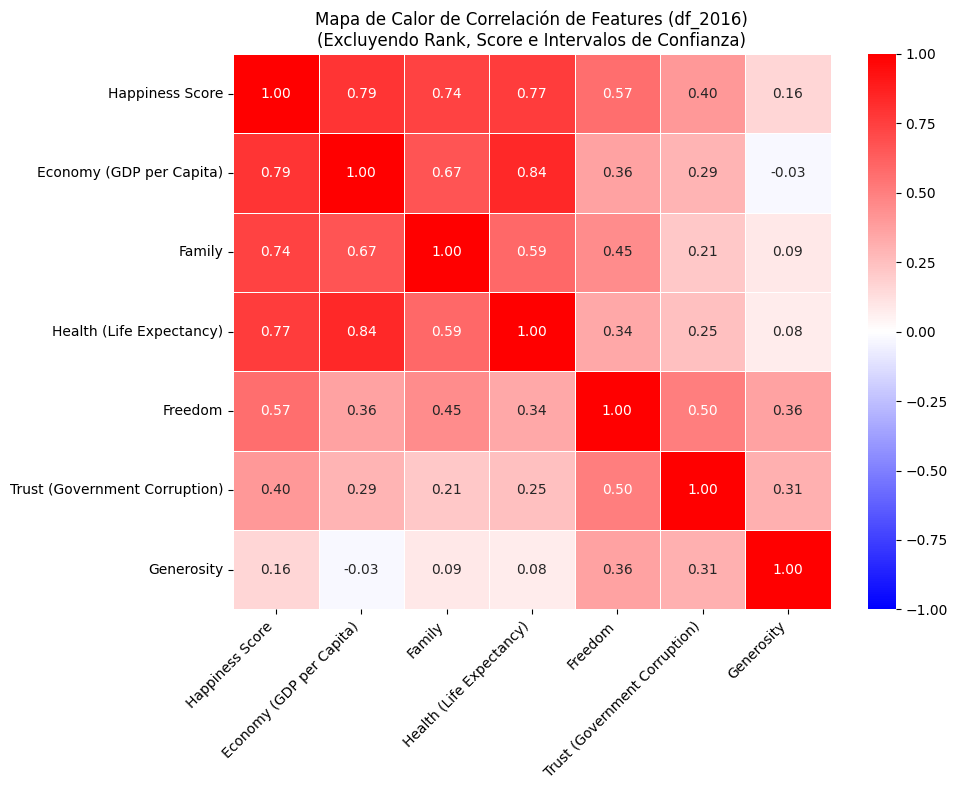

2025-05-21 23:23:27,485 - INFO - Mapa de calor de correlación de features generado y mostrado.


In [10]:
# --- Generar y visualizar la matriz de correlación (Heatmap) ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Iniciando el cálculo de la correlación gráfica para df_2016.")

    numeric_cols = df_2016.select_dtypes(include=np.number).columns.tolist()
    logging.info(f"Columnas numéricas identificadas en df_2016: {numeric_cols}")

    cols_to_exclude_from_features_heatmap = ['Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual']
    actual_cols_to_exclude = [col for col in cols_to_exclude_from_features_heatmap if col in numeric_cols]
    logging.info(f"Columnas a excluir del análisis de correlación de features: {actual_cols_to_exclude}")

    cols_for_correlation = [col for col in numeric_cols if col not in actual_cols_to_exclude]

    if not cols_for_correlation:
        logging.warning("No quedan columnas numéricas para el análisis de correlación de features después de la exclusión.")
    else:
        logging.info(f"Columnas seleccionadas para el heatmap de correlación de features: {cols_for_correlation}")

        df_correlation_subset = df_2016[cols_for_correlation]

        correlation_matrix = df_correlation_subset.corr()
        logging.info("Matriz de correlación de features calculada.")

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix,
                    annot=True,
                    cmap='bwr',
                    fmt=".2f",
                    linewidths=.5,
                    vmin=-1, vmax=1,
                    center=0)
        plt.title('Mapa de Calor de Correlación de Features (df_2016)\n(Excluyendo Rank, Score e Intervalos de Confianza)')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        logging.info("Mapa de calor de correlación de features generado y mostrado.")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:27,494 - INFO - Calculando y visualizando la frecuencia de países por región para df_2016.


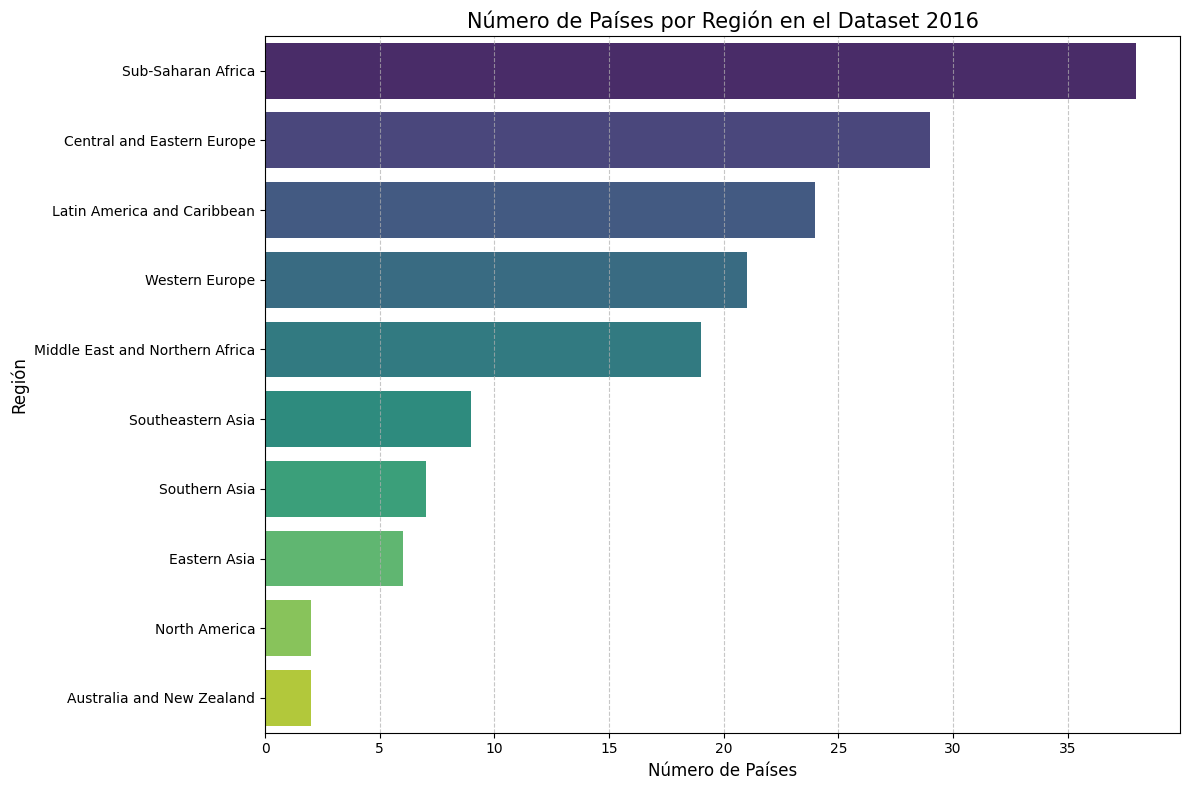

2025-05-21 23:23:27,658 - INFO - Gráfico de barras de frecuencia de países por región generado y mostrado.
2025-05-21 23:23:27,660 - INFO - Tabla de frecuencia de países por región mostrada en formato Markdown.



Frecuencia de Países por Región (df_2016):
| Region                          |   count |
|:--------------------------------|--------:|
| Sub-Saharan Africa              |      38 |
| Central and Eastern Europe      |      29 |
| Latin America and Caribbean     |      24 |
| Western Europe                  |      21 |
| Middle East and Northern Africa |      19 |
| Southeastern Asia               |       9 |
| Southern Asia                   |       7 |
| Eastern Asia                    |       6 |
| North America                   |       2 |
| Australia and New Zealand       |       2 |


In [11]:
# --- Frecuencia de Países por Región ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Calculando y visualizando la frecuencia de países por región para df_2016.")

    region_counts = df_2016['Region'].value_counts()

    plt.figure(figsize=(12, 8))
    sns.barplot(x=region_counts.values, y=region_counts.index, palette="viridis", hue=region_counts.index, legend=False)
    plt.title('Número de Países por Región en el Dataset 2016', fontsize=15)
    plt.xlabel('Número de Países', fontsize=12)
    plt.ylabel('Región', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    logging.info("Gráfico de barras de frecuencia de países por región generado y mostrado.")

    print("\nFrecuencia de Países por Región (df_2016):")
    region_counts_df = region_counts.reset_index()
    region_counts_df.columns = ['Region', 'count']
    print(region_counts_df.to_markdown(index=False))
    logging.info("Tabla de frecuencia de países por región mostrada en formato Markdown.")

else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:27,667 - INFO - Iniciando análisis de 'Happiness Score' por región con boxplot horizontal para df_2016.
2025-05-21 23:23:27,678 - INFO - Estadísticas descriptivas del 'Happiness Score' por región calculadas para df_2016.



Estadísticas Descriptivas del 'Happiness Score' por Región (df_2016 - ordenado por media descendente):
| Region                          |   count |    mean |       std |   min |     25% |    50% |     75% |   max |
|:--------------------------------|--------:|--------:|----------:|------:|--------:|-------:|--------:|------:|
| Australia and New Zealand       |       2 | 7.3235  | 0.0148492 | 7.313 | 7.31825 | 7.3235 | 7.32875 | 7.334 |
| North America                   |       2 | 7.254   | 0.212132  | 7.104 | 7.179   | 7.254  | 7.329   | 7.404 |
| Western Europe                  |      21 | 6.68567 | 0.78919   | 5.033 | 6.361   | 6.907  | 7.339   | 7.526 |
| Latin America and Caribbean     |      24 | 6.10175 | 0.72568   | 4.028 | 5.80225 | 6.126  | 6.66275 | 7.087 |
| Eastern Asia                    |       6 | 5.62417 | 0.526885  | 4.907 | 5.29825 | 5.6465 | 5.8995  | 6.379 |
| Middle East and Northern Africa |      19 | 5.38605 | 1.05756   | 3.069 | 4.7835  | 5.303  | 6.297   | 

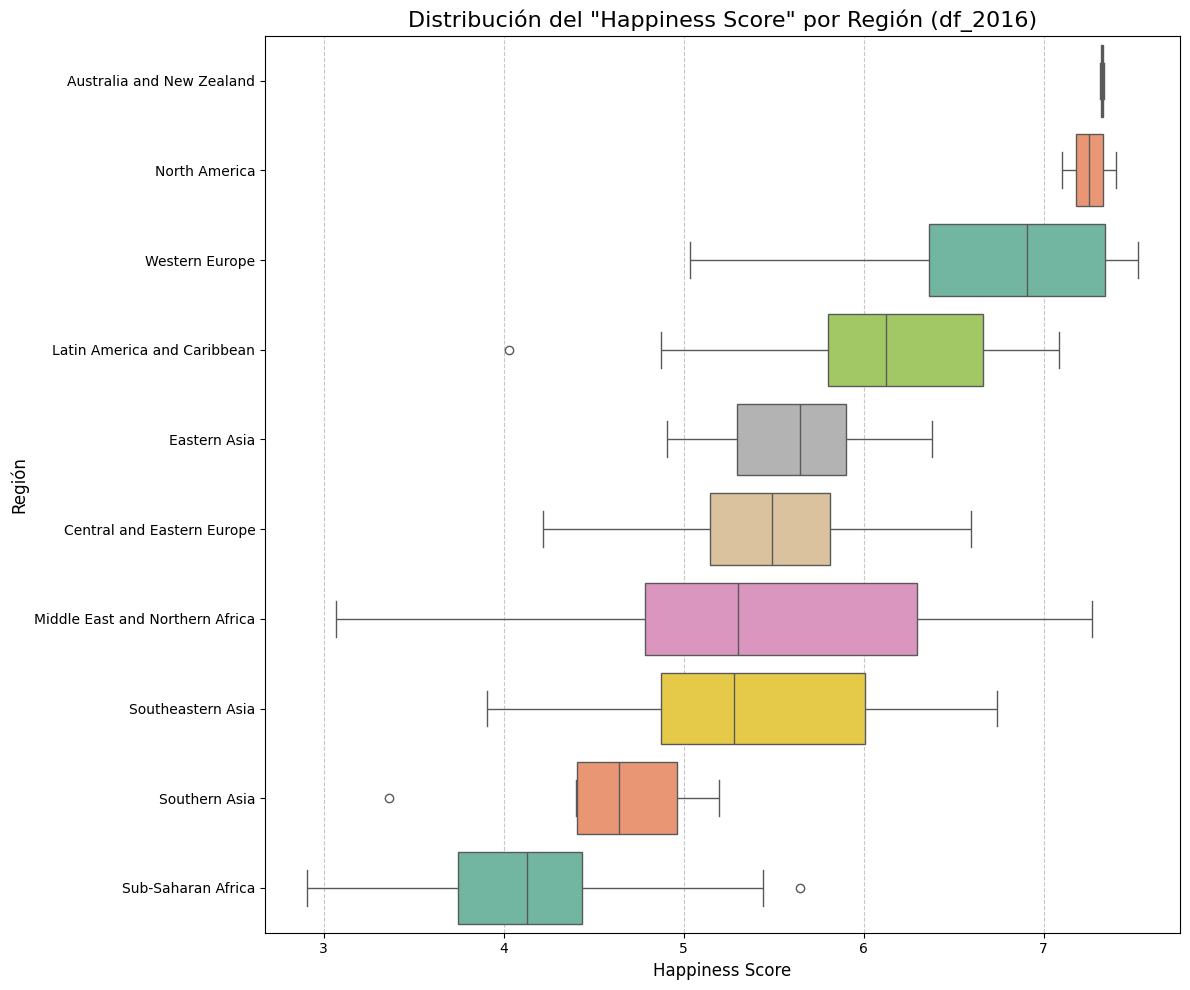

2025-05-21 23:23:27,865 - INFO - Boxplot horizontal del 'Happiness Score' por región mostrado para df_2016.


In [12]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Iniciando análisis de 'Happiness Score' por región con boxplot horizontal para df_2016.")

    happiness_by_region_stats_2016 = df_2016.groupby('Region')['Happiness Score'].describe()
    happiness_by_region_stats_2016 = happiness_by_region_stats_2016.sort_values(by='mean', ascending=False)
    
    print("\nEstadísticas Descriptivas del 'Happiness Score' por Región (df_2016 - ordenado por media descendente):")
    print(happiness_by_region_stats_2016.to_markdown())
    logging.info("Estadísticas descriptivas del 'Happiness Score' por región calculadas para df_2016.")

    plt.figure(figsize=(12, 10)) 
    region_order_bp_2016 = df_2016.groupby('Region')['Happiness Score'].median().sort_values(ascending=False).index
    
    sns.boxplot(data=df_2016, x='Happiness Score', y='Region', order=region_order_bp_2016, hue='Region', legend=False, palette='Set2') 
    
    plt.title('Distribución del "Happiness Score" por Región (df_2016)', fontsize=16)
    plt.xlabel('Happiness Score', fontsize=12)
    plt.ylabel('Región', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    logging.info("Boxplot horizontal del 'Happiness Score' por región mostrado para df_2016.")

else:
    logging.error("El DataFrame df_2016 no está cargado. No se puede generar el gráfico de distribución.")

2025-05-21 23:23:27,875 - INFO - Generando matriz de histogramas/KDE para variables numéricas clave de df_2016.


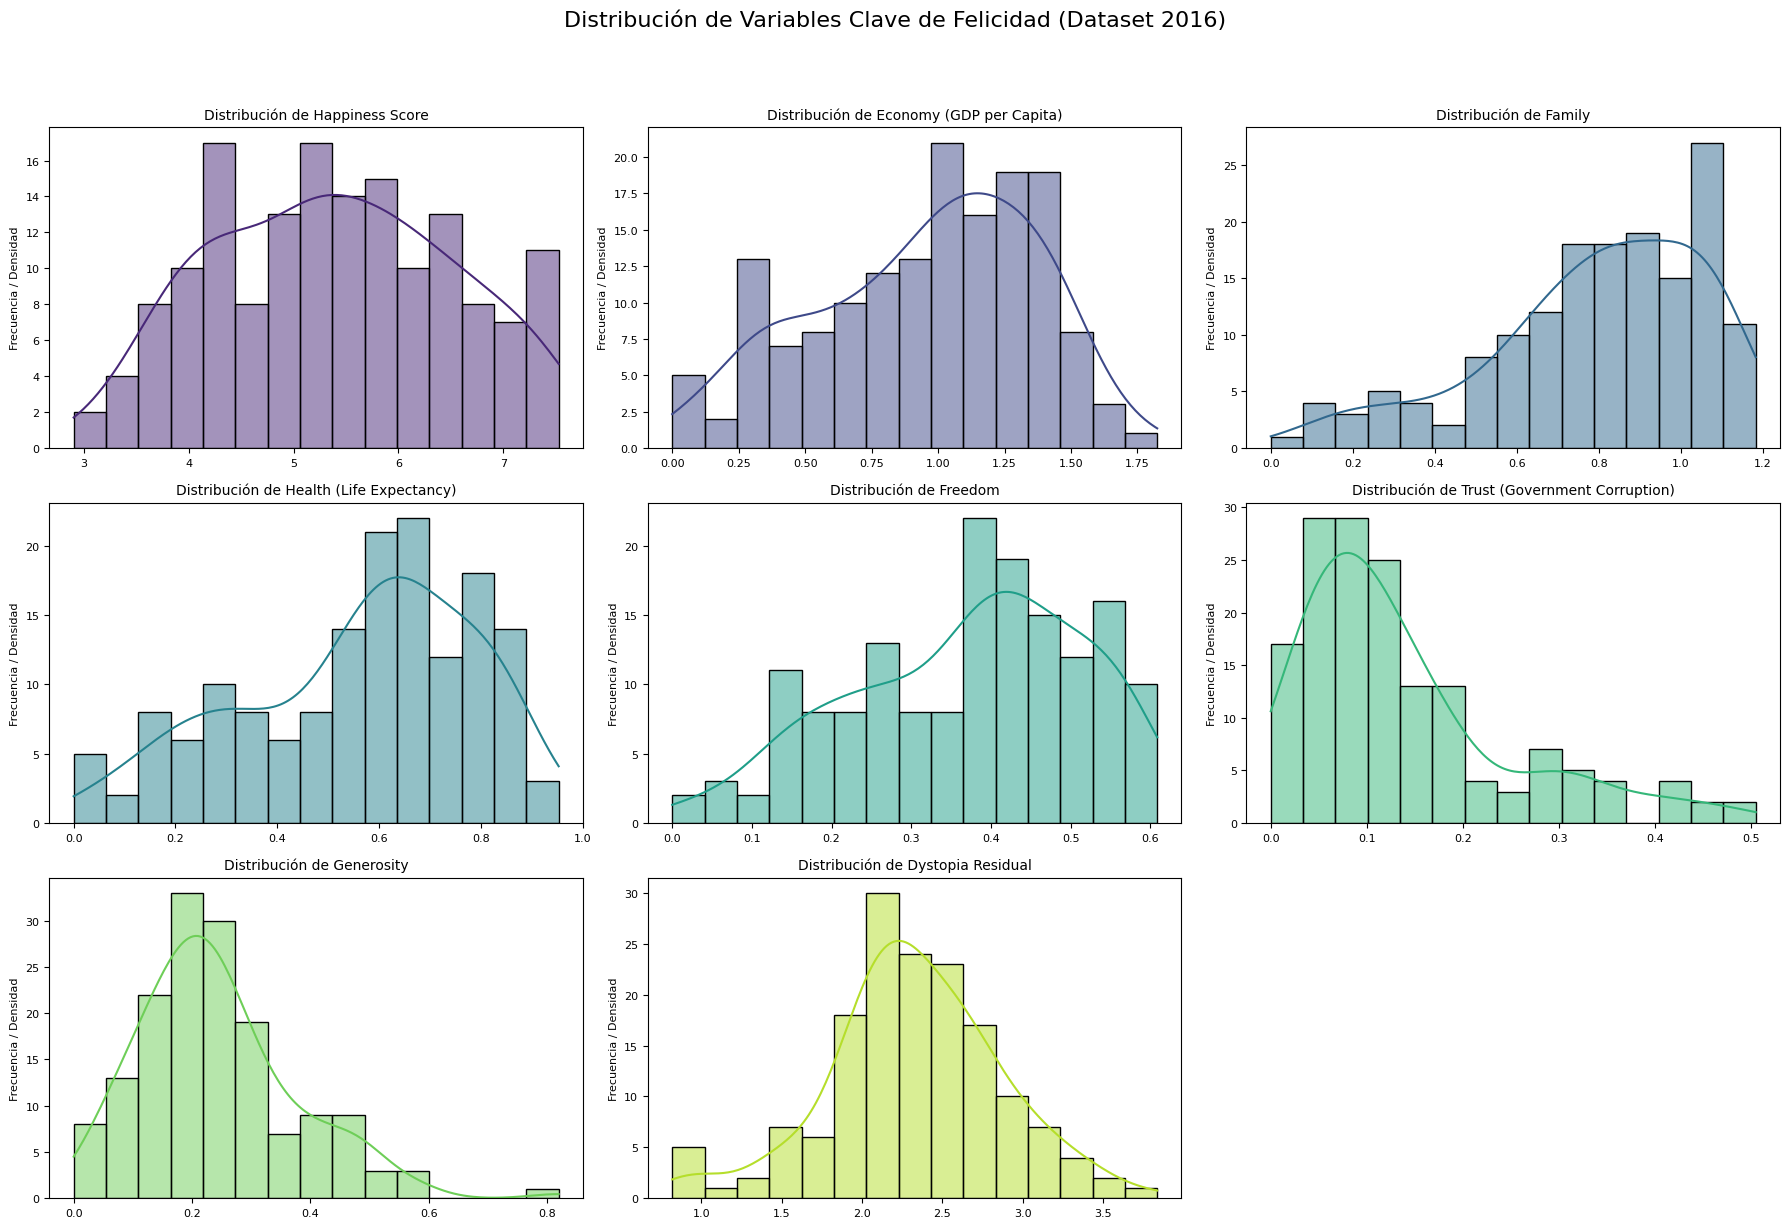

2025-05-21 23:23:28,864 - INFO - Matriz de histogramas/KDE generada y mostrada para df_2016.


In [13]:
# --- Histogramas/KDE para Distribuciones de Variables Numéricas Clave (df_2016) ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Generando matriz de histogramas/KDE para variables numéricas clave de df_2016.")


    cols_for_hist = [
        'Happiness Score', 'Economy (GDP per Capita)', 'Family',
        'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
        'Generosity', 'Dystopia Residual'
    ]

    actual_cols_for_hist = [col for col in cols_for_hist if col in df_2016.columns]

    if not actual_cols_for_hist:
        logging.warning("No hay columnas seleccionadas válidas para generar histogramas/KDE.")
        print("\nNo hay columnas seleccionadas válidas para generar histogramas/KDE.")
    else:
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_hist) + n_cols_plot - 1) // n_cols_plot

        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(18, n_rows_plot * 4))
        fig.suptitle('Distribución de Variables Clave de Felicidad (Dataset 2016)', fontsize=16, y=1.02)

        axes = axes.flatten()

        for i, col in enumerate(actual_cols_for_hist):
            sns.histplot(df_2016[col], kde=True, ax=axes[i], bins=15, color=sns.color_palette("viridis", len(actual_cols_for_hist))[i])
            axes[i].set_title(f'Distribución de {col}', fontsize=10)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('Frecuencia / Densidad', fontsize=8)
            axes[i].tick_params(axis='both', which='major', labelsize=8)

        for j in range(i + 1, n_rows_plot * n_cols_plot):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Matriz de histogramas/KDE generada y mostrada para df_2016.")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:28,873 - INFO - Generando boxplots horizontales para identificar outliers generales en variables numéricas principales de df_2016.


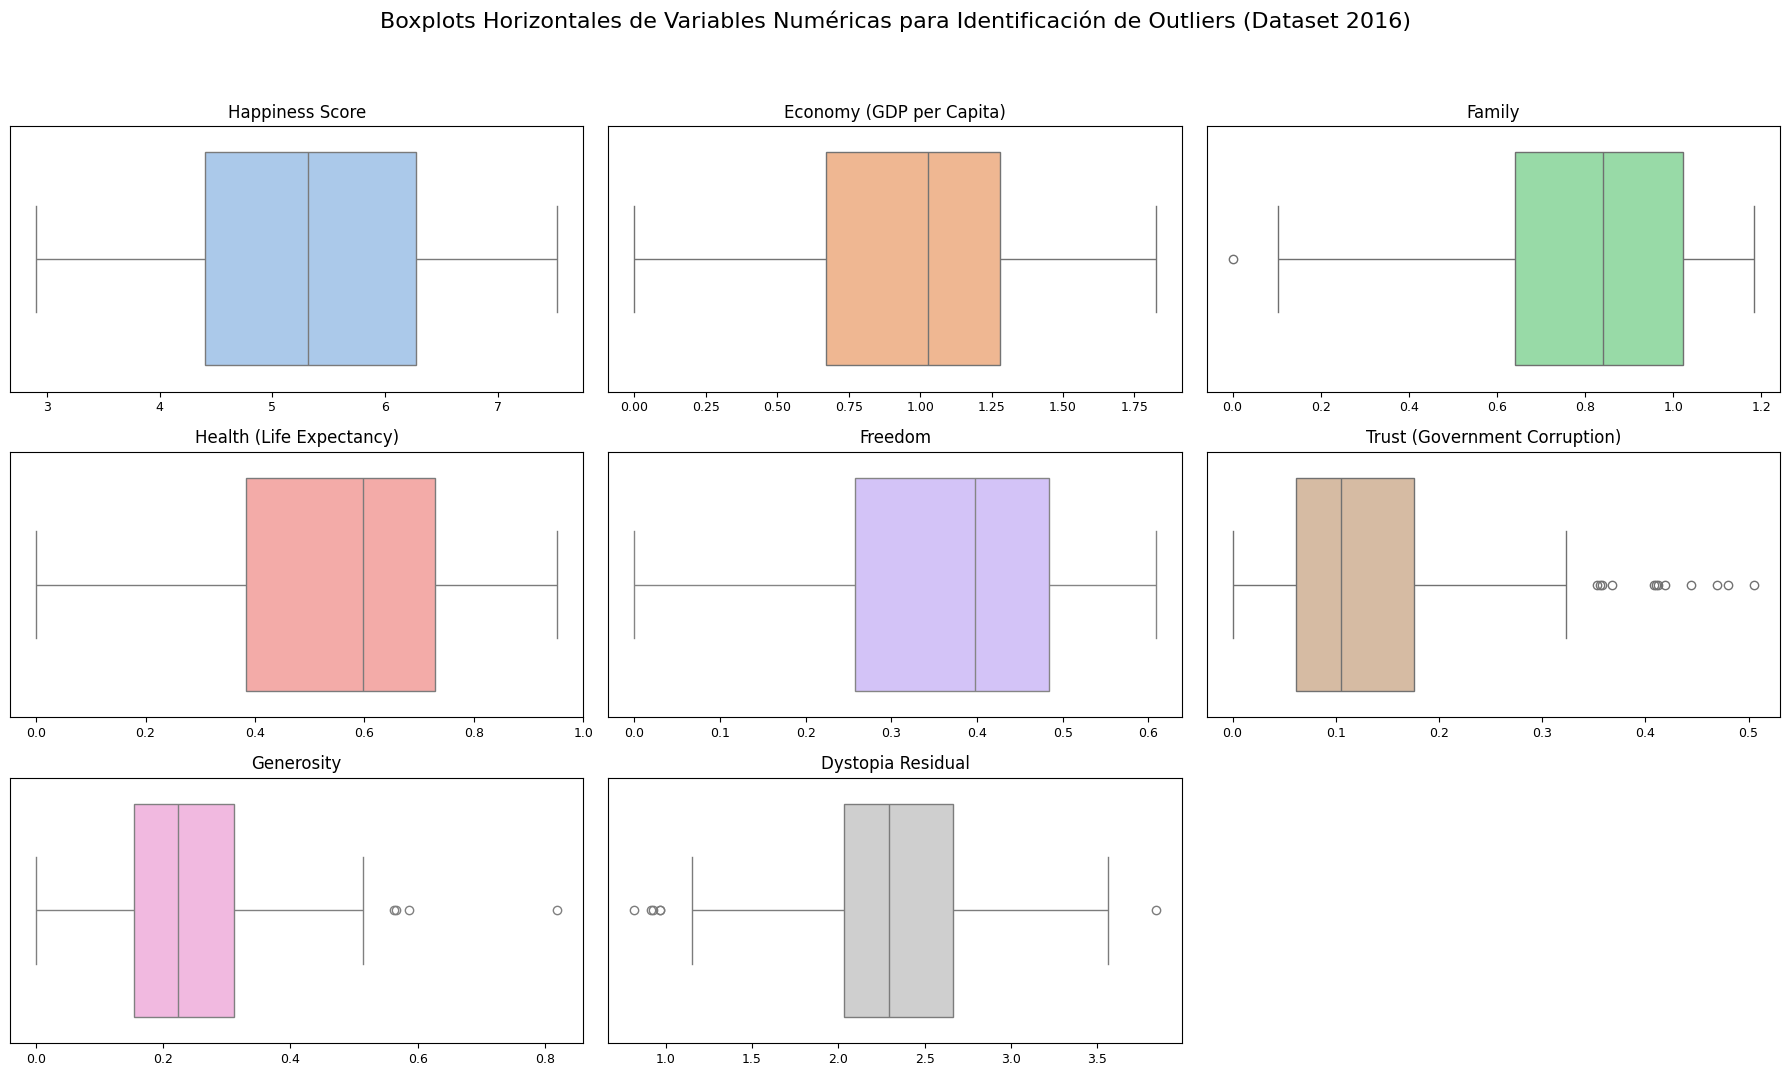

2025-05-21 23:23:29,469 - INFO - Boxplots horizontales generales generados y mostrados para df_2016.


In [14]:
# --- Boxplots Horizontales para Identificación de Outliers Generales ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Generando boxplots horizontales para identificar outliers generales en variables numéricas principales de df_2016.")

    actual_cols_for_hist = [col for col in cols_for_hist if col in df_2016.columns]

    if not actual_cols_for_hist:
        logging.warning("No hay columnas seleccionadas para generar boxplots generales.")
    else:
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_hist) + n_cols_plot - 1) // n_cols_plot

        plt.figure(figsize=(18, n_rows_plot * 3.5))
        plt.suptitle('Boxplots Horizontales de Variables Numéricas para Identificación de Outliers (Dataset 2016)', fontsize=16, y=1.02)

        for i, col in enumerate(actual_cols_for_hist):
            plt.subplot(n_rows_plot, n_cols_plot, i + 1)
            sns.boxplot(x=df_2016[col], color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], orient='h')
            plt.title(col, fontsize=12)
            plt.xlabel('')
            plt.ylabel('')
            plt.xticks(fontsize=9)
            plt.yticks([])

        for j in range(len(actual_cols_for_hist), n_rows_plot * n_cols_plot):
            plt.subplot(n_rows_plot, n_cols_plot, j + 1).set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Boxplots horizontales generales generados y mostrados para df_2016.")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-21 23:23:29,481 - INFO - Generando matriz de boxplots horizontales por región para métricas de felicidad de df_2016.


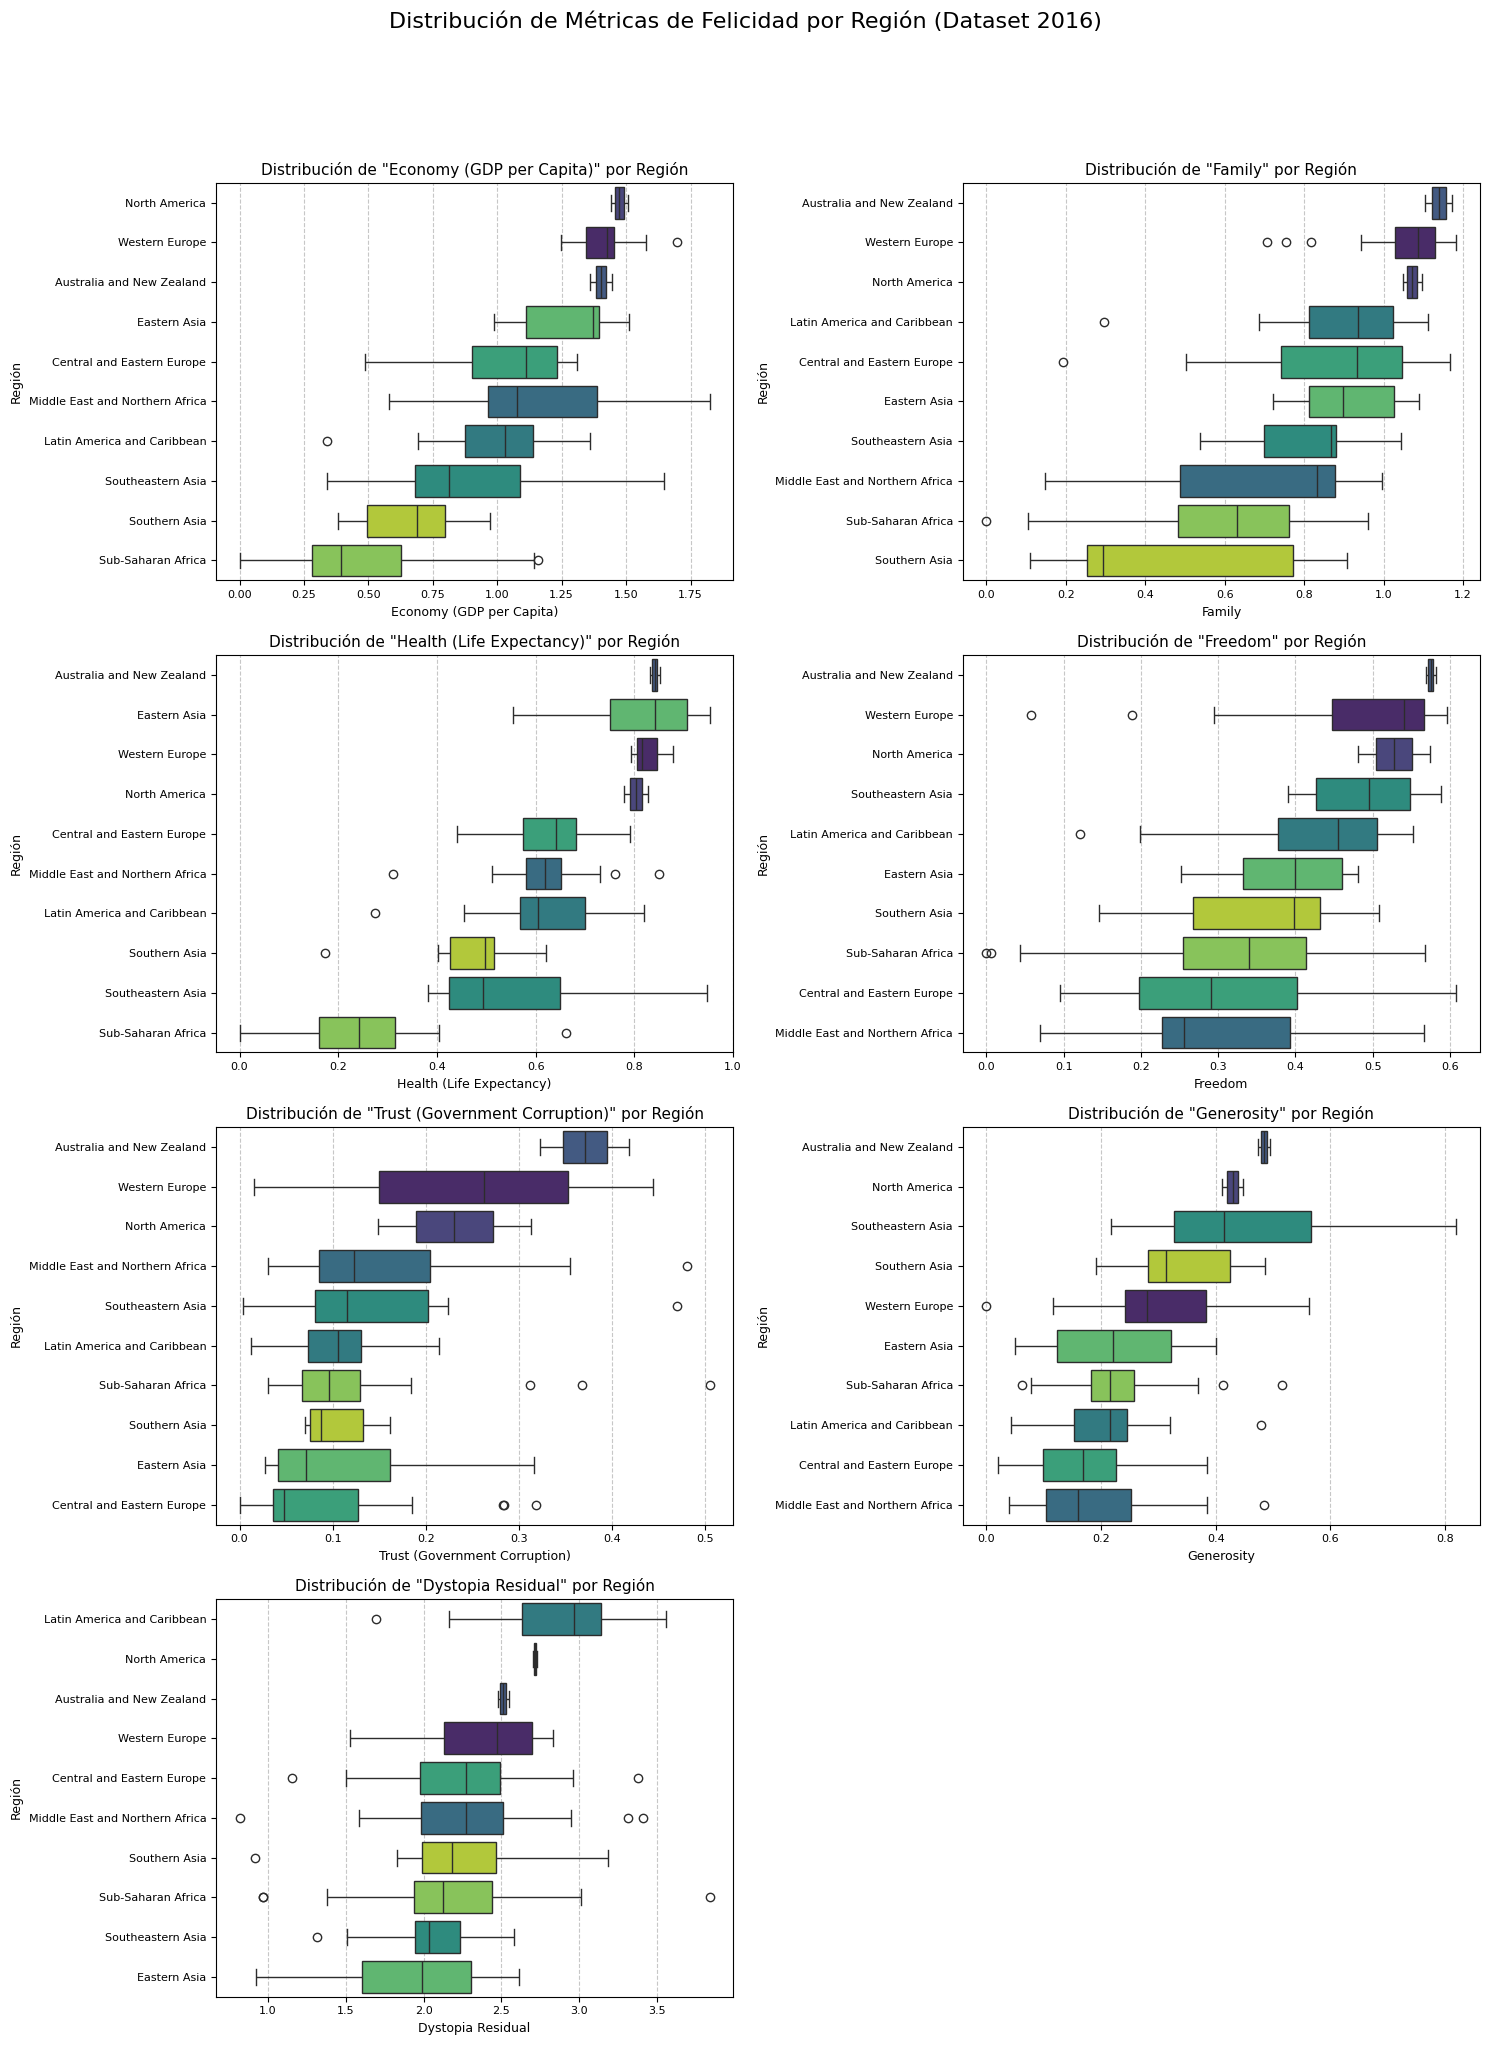

2025-05-21 23:23:30,926 - INFO - Matriz de boxplots horizontales por región mostrada para df_2016.


In [15]:
# --- Matriz de Boxplots por Región para Métricas Principales (df_2016) ---
if 'df_2016' in locals() and df_2016 is not None:
    logging.info("Generando matriz de boxplots horizontales por región para métricas de felicidad de df_2016.")

    actual_metrics_to_plot = [col for col in actual_cols_for_hist if col != 'Happiness Score']

    if 'Region' not in df_2016.columns:
        logging.warning("La columna 'Region' no se encuentra en df_2016. No se pueden generar boxplots por región.")
        print("\nNo se puede generar la matriz de boxplots por región: columna 'Region' no encontrada.")
    elif not actual_metrics_to_plot:
        logging.warning("No hay métricas válidas seleccionadas para los boxplots por región.")
        print("\nNo hay métricas válidas seleccionadas para los boxplots por región.")
    else:
        n_cols_plot = 2
        n_rows_plot = (len(actual_metrics_to_plot) + n_cols_plot - 1) // n_cols_plot

        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 5))
        fig.suptitle('Distribución de Métricas de Felicidad por Región (Dataset 2016)', fontsize=16, y=1.02)
        axes = axes.flatten()

        for i, metric in enumerate(actual_metrics_to_plot):
            if metric in df_2016.columns:
                region_order = df_2016.groupby('Region')[metric].median().sort_values(ascending=False).index
                sns.boxplot(ax=axes[i], data=df_2016, x=metric, y='Region', order=region_order, palette='viridis', hue='Region', legend=False)
                axes[i].set_title(f'Distribución de "{metric}" por Región', fontsize=11)
                axes[i].set_xlabel(metric, fontsize=9)
                axes[i].set_ylabel('Región', fontsize=9)
                axes[i].tick_params(axis='both', which='major', labelsize=8)
                axes[i].grid(axis='x', linestyle='--', alpha=0.7)
            else:
                logging.warning(f"La métrica '{metric}' no se encontró en el DataFrame y será omitida.")
                if i < len(axes):
                    fig.delaxes(axes[i])


        for j in range(i + 1, len(axes)):
             fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()
        logging.info("Matriz de boxplots horizontales por región mostrada para df_2016.")
else:
    logging.error("El DataFrame df_2016 no está cargado. Por favor, ejecuta la celda de carga primero.")